In [1]:
%matplotlib notebook
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from escape.parse import swissfel
import sys

In [2]:
sys.path.insert(0, '../src/')
from data_analysis import *
from integrators import *
from fit_tools import*

In [3]:
n_shots = 2000
run = '0011_jet10um_RT'
path = '/sf/bernina/data/p17743/res/scan_info/'

In [4]:
# load data                                                                         
file_path = '%srun%s.json'%(path,run)
print('-- Loading data:%s'%file_path)
data = swissfel.parseScanEco_v01(file_path,createEscArrays=True,memlimit_mD_MB=50)

-- Loading data:/sf/bernina/data/p17743/res/scan_info/run0011_jet10um_RT.json
Found empty dataset in SARES20-PROF142-M3:FPICTURE in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 1
Found empty dataset in SARES20-PROF142-M3:FPICTURE in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 1
No event dimension eventDim defined,                    assuming 0th Dimension.
No event dimension eventDim defined,                    assuming 0th Dimension.
No event dimension eventDim defined,                    assuming 0th Dimension.
No event dimension eventDim defined,                    assumi

In [7]:
spectrum = data['SARFE10-PSSS059:FPICTURE.spectrum'].data.compute().astype('float32')

spectrum_avg = np.average(spectrum,axis=0)
energy = np.arange(len(spectrum_avg))#np.loadtxt('/sf/bernina/data/p17743/res/FEL_spectrum/spectrum_Eaxis_2019-01-30T14:59:51.030128.txt')
baseline = np.average(spectrum_avg[2000:])
spectrum -= baseline#.astype('uint32')
spectrum_avg-=baseline

<IPython.core.display.Javascript object>


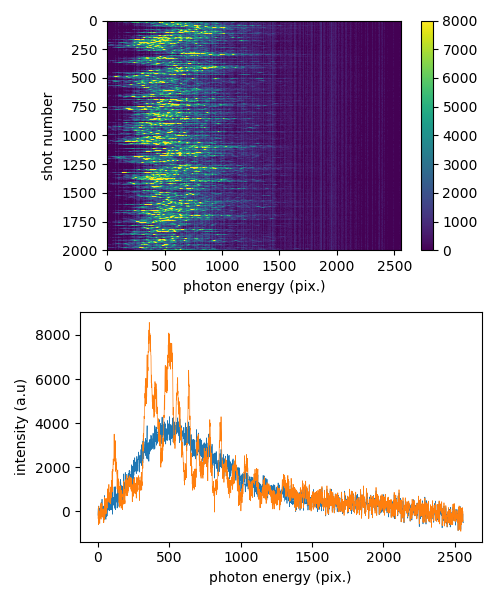

In [9]:
plt.figure(figsize=[5,6])
plt.subplot(2,1,1)
plt.imshow(spectrum,clim=[0,8e3])
plt.colorbar()
plt.xlabel('photon energy (pix.)')
plt.ylabel('shot number')

plt.subplot(2,1,2)
plt.plot(energy,spectrum_avg,lw=0.5)
plt.plot(energy,spectrum[1],lw=0.5)
plt.xlabel('photon energy (pix.)')
plt.ylabel('intensity (a.u)')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


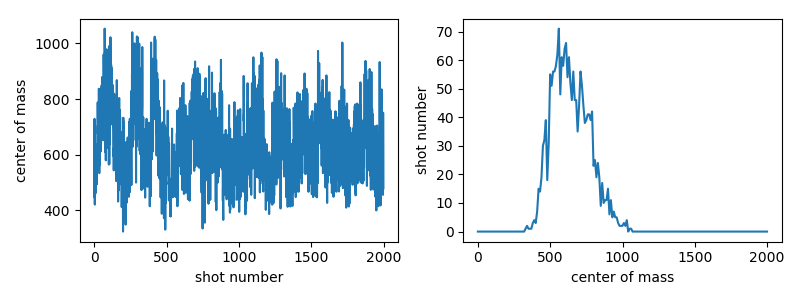

In [18]:
def fast_center_mass(x,y):
    """
    calculates the center of mass based on cumulative average
    """
    a = np.cumsum(y)/ np.sum(y)
    o = (a > 0.5)[1:]
    u = (a < 0.5)[:-1]
    e = o * u
    m = x[1:][e]
    return m

center_mass = np.zeros(n_shots)
for i in range(n_shots):
    center_mass[i] = fast_center_mass(energy,spectrum[i])

plt.figure(figsize=[8,3])
plt.subplot(1,2,1)
plt.plot(center_mass)
plt.ylabel('center of mass')
plt.xlabel('shot number')

plt.subplot(1,2,2)
bi,bf,db = 0,2000,10
bins = np.arange(bi-db,bf+db,db)
hy,hx = np.histogram(center_mass,bins=bins)
plt.plot(hx[1:]-1,hy)
plt.tight_layout()
plt.ylabel('shot number')
plt.xlabel('center of mass')
#plt.xlim(10,50)
plt.tight_layout()

plt.show()